In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings

In [3]:
df=pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X=df.drop(columns=['math score'],axis=1)

In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y=df['math score']

In [10]:
# Create Column Transformer with 3 types of transformers
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns
num_transformers=StandardScaler()
cat_transformers=OneHotEncoder()
preprocessor=ColumnTransformer([("OneHotEncoder",cat_transformers,cat_features),
                                ('StandardScaler',num_transformers,num_features),])


In [11]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(),
                                 Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['reading score', 'writing score'], dtype='object'))])

In [13]:
X=preprocessor.fit_transform(X)
X.shape

(1000, 19)

In [15]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(800, 19) (200, 19) (800,) (200,)


In [19]:
#Create an Evaluate function to give all metrics after model training

In [20]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    # mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_squared=r2_score(true,predicted)
    return mae,rmse,r2_squared

In [22]:
models={'LinearRegression':LinearRegression(),'Lasso':Lasso(),
        'Ridge':Ridge(),'K-Neighbors Regressor':KNeighborsRegressor(),
        'Decision Tree': DecisionTreeRegressor(),'Random Forest Regressor': RandomForestRegressor(),
        'XGBRegressor':XGBRegressor(),"CatBoost Regressor":CatBoostRegressor(verbose=False),
        "AdaBoost Regressor":AdaBoostRegressor()}

In [23]:
models

{'LinearRegression': LinearRegression(),
 'Lasso': Lasso(),
 'Ridge': Ridge(),
 'K-Neighbors Regressor': KNeighborsRegressor(),
 'Decision Tree': DecisionTreeRegressor(),
 'Random Forest Regressor': RandomForestRegressor(),
 'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...),
 'CatBo

In [25]:
models_list=[]
r2_list=[]

for model_str,model_inst in models.items():
    curr_model=model_inst.fit(X_train,y_train)

    # Make predictions
    y_train_pred=curr_model.predict(X_train)
    y_test_pred=curr_model.predict(X_test)

    #Evaluate Train and Test dataset
    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(model_str)
    models_list.append(model_str)
    print('Model performance for training set')
    print(f"-Root Mean Squared Error: {model_train_rmse:.4f}")
    print(f"-Mean Absolute Error: {model_train_mae:.4f}")
    print(f"-r2 Score: {model_train_r2:.4f}")

    print('------------------------------')

    print('Model performance Test Set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


LinearRegression
Model performance for training set
-Root Mean Squared Error: 5.2614
-Mean Absolute Error: 4.1893
-r2 Score: 0.8809
------------------------------
Model performance Test Set
- Root Mean Squared Error: 5.5986
- Mean Absolute Error: 4.4897
- R2 Score: 0.8562


Lasso
Model performance for training set
-Root Mean Squared Error: 6.5244
-Mean Absolute Error: 5.1385
-r2 Score: 0.8169
------------------------------
Model performance Test Set
- Root Mean Squared Error: 6.4524
- Mean Absolute Error: 5.1328
- R2 Score: 0.8089


Ridge
Model performance for training set
-Root Mean Squared Error: 5.2566
-Mean Absolute Error: 4.1873
-r2 Score: 0.8811
------------------------------
Model performance Test Set
- Root Mean Squared Error: 5.6070
- Mean Absolute Error: 4.4947
- R2 Score: 0.8557


K-Neighbors Regressor
Model performance for training set
-Root Mean Squared Error: 5.7781
-Mean Absolute Error: 4.6150
-r2 Score: 0.8564
------------------------------
Model performance Test Set
- 

In [26]:
print(models_list,r2_list)

['LinearRegression', 'Lasso', 'Ridge', 'K-Neighbors Regressor', 'Decision Tree', 'Random Forest Regressor', 'XGBRegressor', 'CatBoost Regressor', 'AdaBoost Regressor'] [0.8561516073224107, 0.8089324062039766, 0.8557211028005074, 0.7541532508251432, 0.6414666069455204, 0.826026950577182, 0.801825277416665, 0.8327553003819385, 0.8152828018313687]


In [27]:
pd.DataFrame(list(zip(models_list,r2_list)),columns=['ModelName','Score']).sort_values(by=['Score'],ascending=False)

,ModelName,Score
0,LinearRegression,0.856152
2,Ridge,0.855721
7,CatBoost Regressor,0.832755
5,Random Forest Regressor,0.826027
8,AdaBoost Regressor,0.815283
1,Lasso,0.808932
6,XGBRegressor,0.801825
3,K-Neighbors Regressor,0.754153
4,Decision Tree,0.641467


In [31]:
lr_model=LinearRegression(fit_intercept=True)
lr_model=lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print(f"Accuracy of them model is {score:.4f}%")

Accuracy of them model is 85.6152%


Text(0, 0.5, 'Predicted')

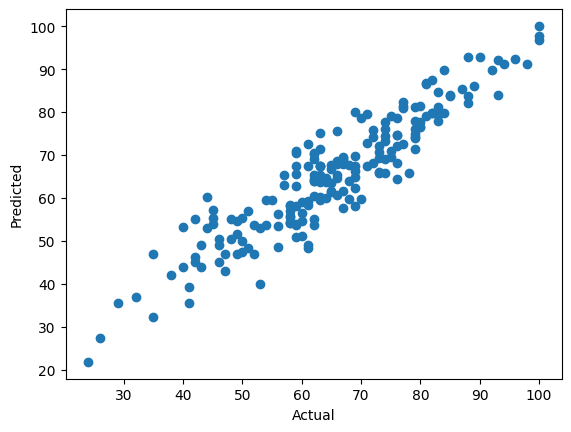

In [32]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

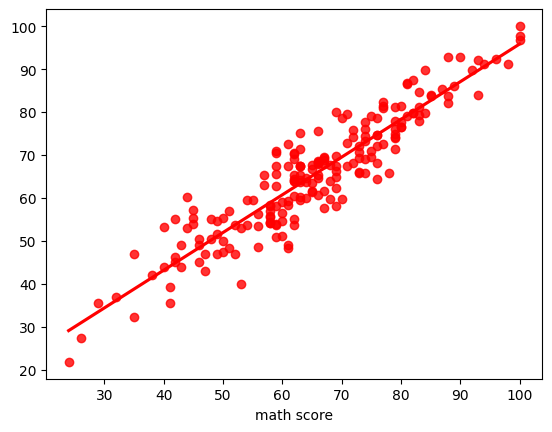

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='Red')

In [34]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df


,Actual Value,Predicted Value,Difference
492,83,81.09375,1.90625
383,38,42.03125,-4.03125
856,75,69.53125,5.46875
834,58,54.09375,3.90625
603,60,56.62500,3.37500
...,...,...,...
72,41,39.34375,1.65625
400,59,54.06250,4.93750
813,87,85.31250,1.68750
195,61,59.31250,1.68750
